# Predicting Heart Disease with ML

This notebook will use various python machine learning and datascience libraries and tools to build a algorithm that will attempt to predict if a person has heart disease based on their medical attributes

In [1]:
def what():
    
    '''Info Function to list out process steps"what()" '''
    
    print(f" 1. Problem definition: \n", 
          "2. Data retrival and exploration: \n",
          "3. Evaluation Goal: \n",
          "4. Feature Engineering: \n",
          "5. Modeling: \n",
          "6. Expirementation: \n" 
         )

In [2]:
what()

 1. Problem definition: 
 2. Data retrival and exploration: 
 3. Evaluation Goal: 
 4. Feature Engineering: 
 5. Modeling: 
 6. Expirementation: 



## Problem definition:

>Given clinical parameters about a patient attempt to predict if they have heart disease or not

### Data Description & Data Dictionary


>The Data used in this notebook comes from the Clevland Heart disease  dataset availble from the UCI Machine Learning repository. This dataset contains 76 attributes, However the author the the dataset states all published experiments refer to using a subset of 14 of these attributes. This dataset too uses only these 14 attributes. The "goal" field refers to the presence of heart disease in the patient. 


* age 

* sex - (1 = male; 0 = female)

* cp - chest pain type (4 values)

* trestbps - resting blood pressure

* chol - serum cholestoral in mg/dl

* fbs - fasting blood sugar > 120 mg/dl

* restecg - resting electrocardiographic results (values 0,1,2)

* thalach - maximum heart rate achieved

* exang - exercise induced angina

* oldpeak - oldpeak = ST depression induced by exercise relative to rest

* slope - the slope of the peak exercise ST segment

* ca - number of major vessels (0-3) colored by flourosopy

* thal - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* num/target 

>https://archive.ics.uci.edu/ml/datasets/heart+disease

### Evaluation Goals

>Attempt to get 90% accuracy on data before moving to QA

### Feature Engineering



In [3]:
# Exploritoray and data analyasis and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [4]:
# Get Data

df = pd.read_csv("data/heart-disease.csv")

## Data Exploration
>Goal: Understand the Data

1. What questions are you trying to answer?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. What are the outliers in the data and why should we care?
5. How can we add change, or remove features to get more accuracy?
6. How many different classes does our data have?

In [5]:
df.shape

(303, 14)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

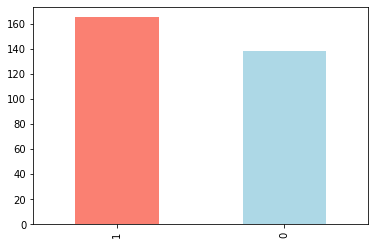

In [10]:
df["target"].value_counts().plot( kind="bar", color=["salmon", "lightblue"]);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency based on sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


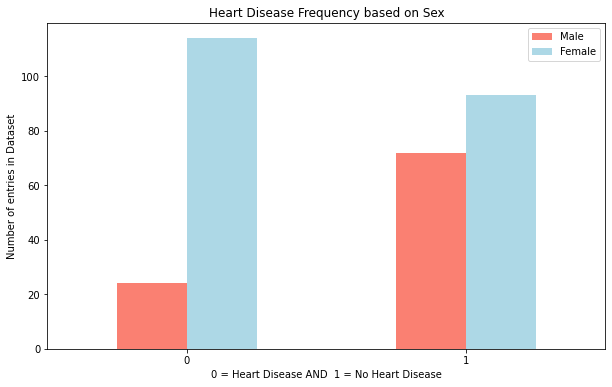

In [16]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency based on Sex")
plt.legend(["Male", "Female"])
plt.xlabel("0 = Heart Disease AND  1 = No Heart Disease")
plt.ylabel("Number of entries in Dataset")
plt.xticks(rotation= 0);

### SWAG or intuition based on the current data..

>_Total Female entries = 96 
> * 76 have heart disease 
> * 24 Do not have heart disease 
> * This shows about 75% have heart disese in this dataset 
  
>_Total Male entries = 207 
> * 114 have heart disease 
> * 96 Do not have heart disease 
> * This shows about 50% have heart disease within this dataset 
  
>_Total entries = 303 
> * 165 have heart disease 
> * 138 Do not have heart disease 
> * This shows about 54% total have heart disease within this dataset  
  
>  These intuitions will be helpfuls as baselines later when we evaluate our models accuracy

### Age vs Max Heart Rate Achieved (thalach) Heart Disease correlation

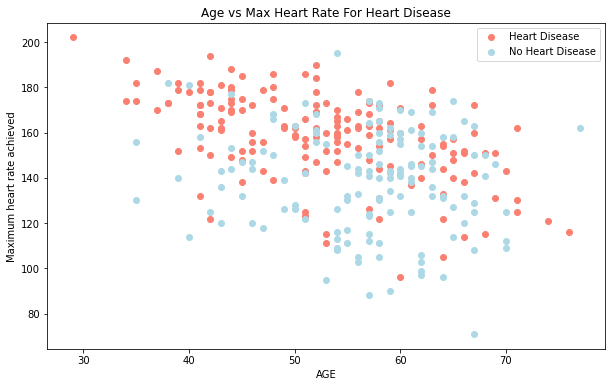

In [17]:
plt.figure(figsize=(10,6));

# Create plot with positive entries

plt.scatter(df.age[df.target == 1], 
            df.thalach[df.target == 1],
           color="salmon");

# Scatter with negative entries

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c='lightblue');

plt.title("Age vs Max Heart Rate For Heart Disease");
plt.xlabel("AGE");
plt.ylabel("Maximum heart rate achieved");
plt.legend(["Heart Disease","No Heart Disease"]);

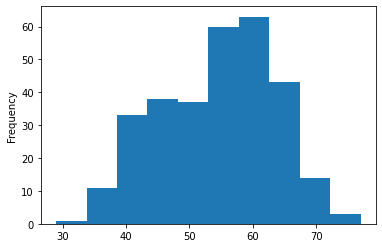

In [18]:
#distribution of age 

df.age.plot.hist();

### Heart Disease frequency per chest pain type breakdown

###### cp: chest pain type. 


>1: typical angina. 

>2: atypical angina. 

>3: non-anginal pain.

>4: asymptomatic. 


In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


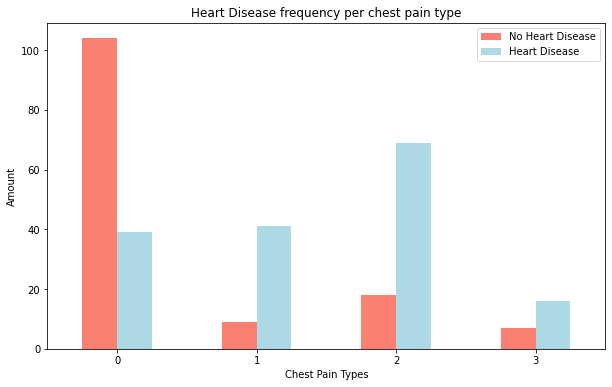

In [20]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"]);
plt.title("Heart Disease frequency per chest pain type");
plt.xlabel("Chest Pain Types");
plt.ylabel("Amount");
plt.xticks(rotation="0");
plt.legend(["No Heart Disease", "Heart Disease"]);

### Check the correlation of all the features

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


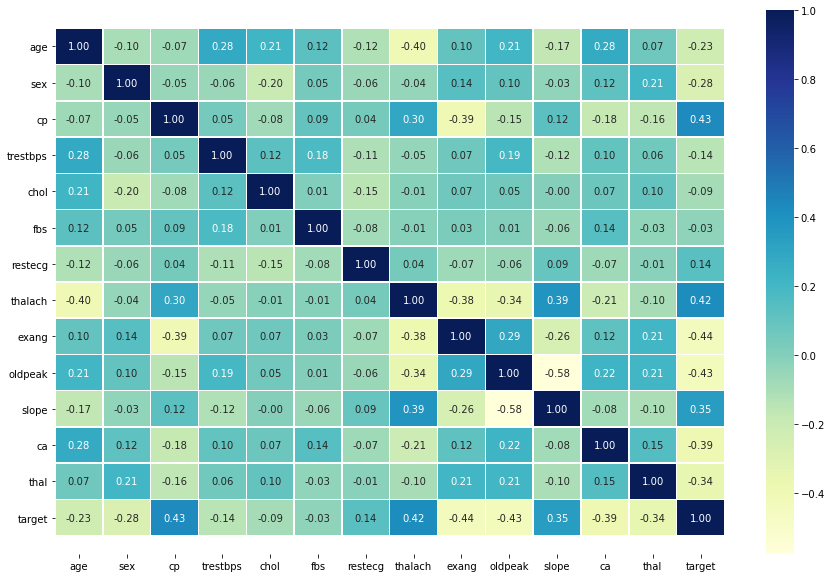

In [22]:
## Plot the correlations

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);